In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv(r"C:\Users\sweth\OneDrive\Pictures\Desktop\Test Jupyter\world_population.csv")

In [3]:
data

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [4]:
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [6]:
data.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [7]:
data.shape

(234, 17)

In [8]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [9]:
continent_df = data.groupby(by='Continent').sum()
continent_df

,Rank,CCA3,Country/Territory,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,,,,
Africa,5253,DZAAGOBENBWABFABDICMRCPVCAFTCDCOMDJICODEGYGNQE...,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,AlgiersLuandaPorto-NovoGaboroneOuagadougouBuju...,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,AFGARMAZEBHRBGDBTNBRNKHMCHNGEOHKGINDIDNIRNIRQI...,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,KabulYerevanBakuManamaDhakaThimphuBandar Seri ...,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,ALBANDAUTBLRBELBIHBGRHRVCYPCZEDNKESTFROFINFRAD...,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,TiranaAndorra la VellaViennaMinskBrusselsSaraj...,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33
North America,6437,AIAATGABWBHSBRBBLZBMUVGBCANCYMCRICUBCUWDMADOMS...,AnguillaAntigua and BarbudaArubaBahamasBarbado...,The ValleySaint John’sOranjestadNassauBridgeto...,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51
Oceania,4336,ASMAUSCOKFJIPYFGUMKIRMHLFSMNRUNCLNZLNIUNFKPLWP...,American SamoaAustraliaCook IslandsFijiFrench ...,Pago PagoCanberraAvaruaSuvaPapeeteHagåtñaTaraw...,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55
South America,1366,ARGBOLBRACHLCOLECUFLKGUFGUYPRYPERSURURYVEN,ArgentinaBoliviaBrazilChileColombiaEcuadorFalk...,Buenos AiresSucreBrasiliaSantiagoBogotaQuitoSt...,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.6077,14.1114,5.48


In [10]:
asian_countries = data.loc[data["Continent"]=="Asia"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Africa
african_countries = data.loc[data["Continent"]=="Africa"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Europe
european_countries = data.loc[data["Continent"]=="Europe"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# North America
na_countries = data.loc[data["Continent"]=="North America"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Oceania
oc_countries = data.loc[data["Continent"]=="Oceania"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# South America
sa_countries = data.loc[data["Continent"]=="South America"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

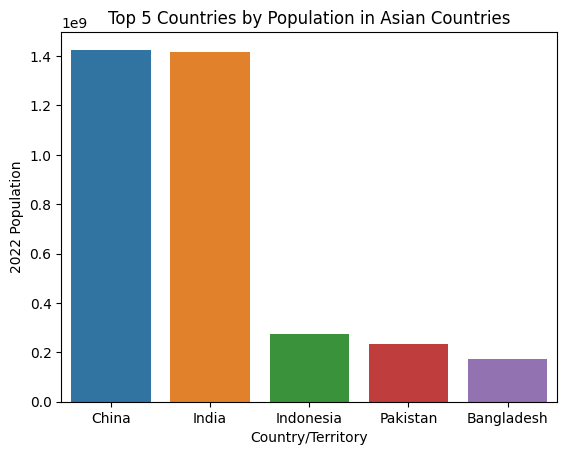

In [11]:
top_5_countries = asian_countries[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in Asian Countries")

plt.show()

Text(0.5, 1.0, 'Top 5 Countries by Population in African Countries')

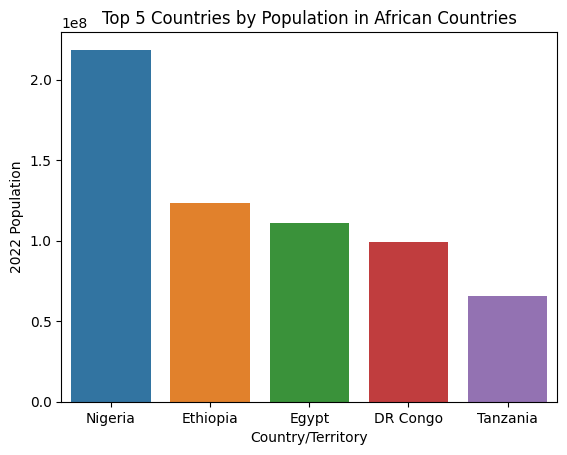

In [12]:
top_5_african = african_countries[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

sns.barplot(data=top_5_african, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in African Countries")

Text(0.5, 1.0, 'Top 5 Countries by Population in europe Countries')

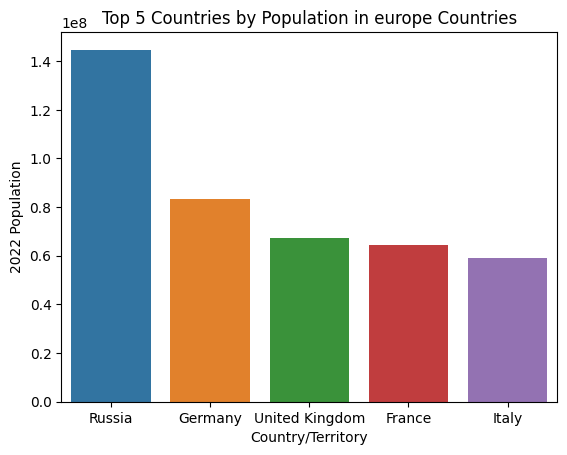

In [13]:
top_5_european =european_countries [["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

sns.barplot(data=top_5_european, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in europe Countries")

Text(0.5, 1.0, 'Top 5 Countries by Population in North America Countries')

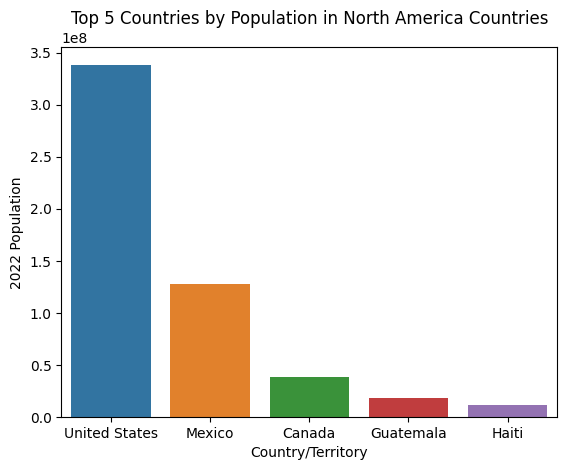

In [14]:
top_5_na =na_countries [["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

sns.barplot(data=top_5_na, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in North America Countries")

Text(0.5, 1.0, 'Top 5 Countries by Population in Ocien Countries')

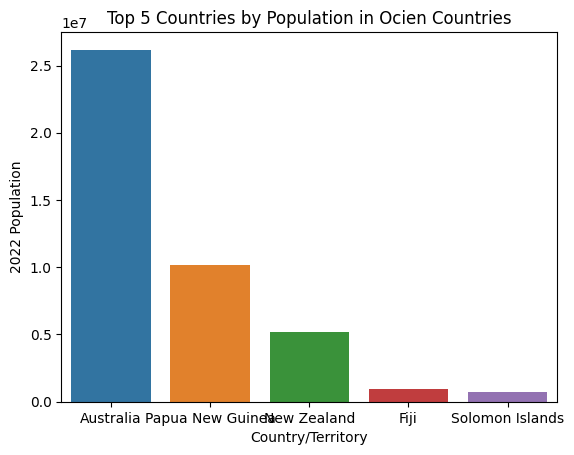

In [15]:
top_5_oc =oc_countries [["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

sns.barplot(data=top_5_oc, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in Ocien Countries")

Text(0.5, 1.0, 'Top 5 Countries by Population in South America Countries')

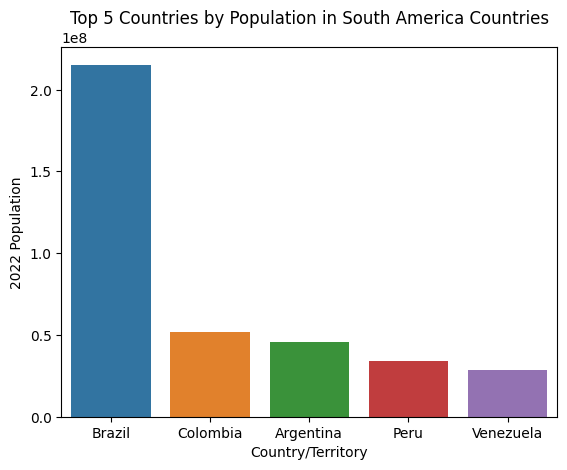

In [16]:
top_5_sa =sa_countries [["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

sns.barplot(data=top_5_sa, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in South America Countries")